## Sentiment analysis on IMDB dataset

Sentiment analysis is the process of classifying whether a block of text is positive, negative, or, neutral. Sentiment analysis is contextual mining of words which indicates the social sentiment of a brand and also helps the business to determine whether the product which they are manufacturing is going to make a demand in the market or not. The goal which Sentiment analysis tries to gain is to analyze people’s opinion in a way that it can help the businesses expand. It focuses not only on polarity (positive, negative & neutral) but also on emotions (happy, sad, angry, etc.)

### Process WorkFlow 

### 1.Data Analysis

### 2.Data Cleaning 

### 3.Data Visualzation

### 4. ML Model 

In [1]:
pip install wordcloud

In [2]:
#Import Labrary which we will use in further process
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords 
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

### Data Analysis

In [3]:
#import our datset by using pandas 
data = pd.read_csv("IMDB dataset.csv")

In [4]:
#check shape of dataset 
data.shape

(50000, 2)

In [5]:
#first five data 
data.head()
#last five data 
data.tail()
#any sample value 
data.sample()

review sentiment
421  This story about three women is a very sensiti...  negative

In [6]:
#data type information of our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
#see some basic math parameters 
data.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

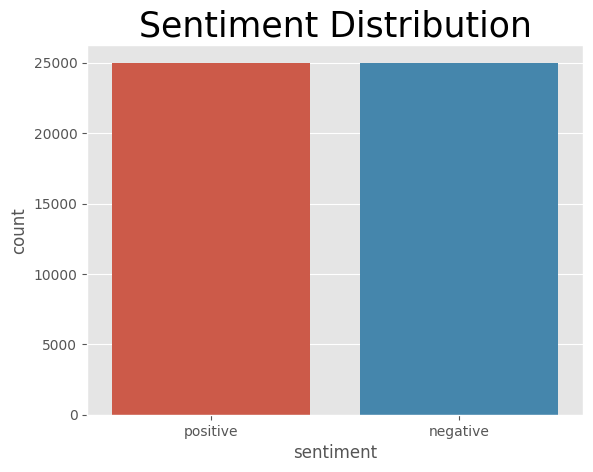

In [8]:
#Here we are Ploting Count plot to see Sentiment Distribution
sns.countplot(x="sentiment", data=data)
plt.title("Sentiment Distribution", fontsize=(25))
plt.show()

In [9]:
## first five review
for i in range(5):
    print("Review", [i])
    print(data["review"].iloc[i], "\n")
    print("Sentiment:", data["sentiment"].iloc[i], "\n")

Review [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due

In [10]:
#Find Number of word in each review 
#creat function for it 
def no_word(text):
    word = text.split()
    word_count = len(word)
    return word_count

#count = data["review"].apply(lambda x: no_word(x))

In [11]:
data["word_count"] = data["review"].apply(lambda x: no_word(x))

In [12]:
data.head()

review sentiment  word_count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

### Data Visulaztion

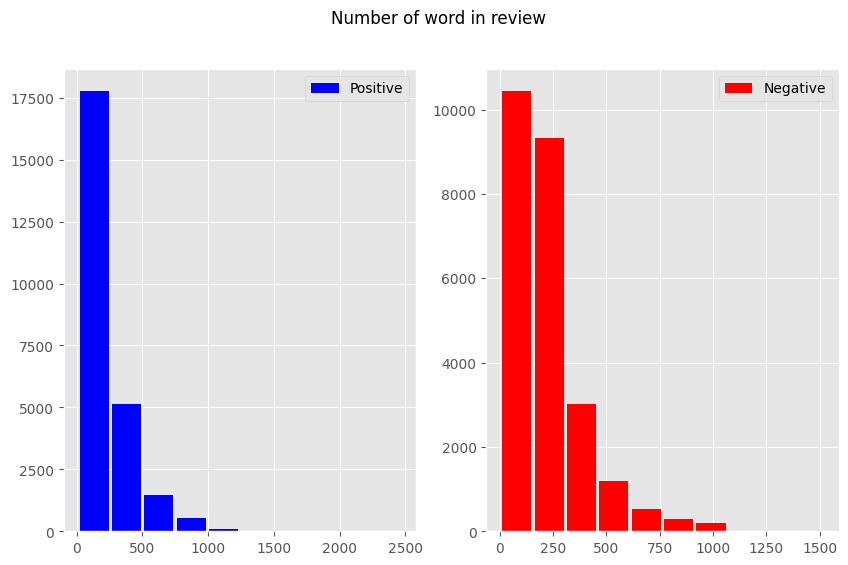

In [13]:
#plot graph to visualzation of wordcount of positive and negative 
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(data[data["sentiment"]=="positive"]["word_count"], label="Positive", color="blue", rwidth=0.9);
ax[0].legend(loc="upper right");
ax[1].hist(data[data["sentiment"]=="negative"]["word_count"], label="Negative", color="red", rwidth=0.9);
ax[1].legend(loc="upper right");
fig.suptitle("Number of word in review")
plt.show()

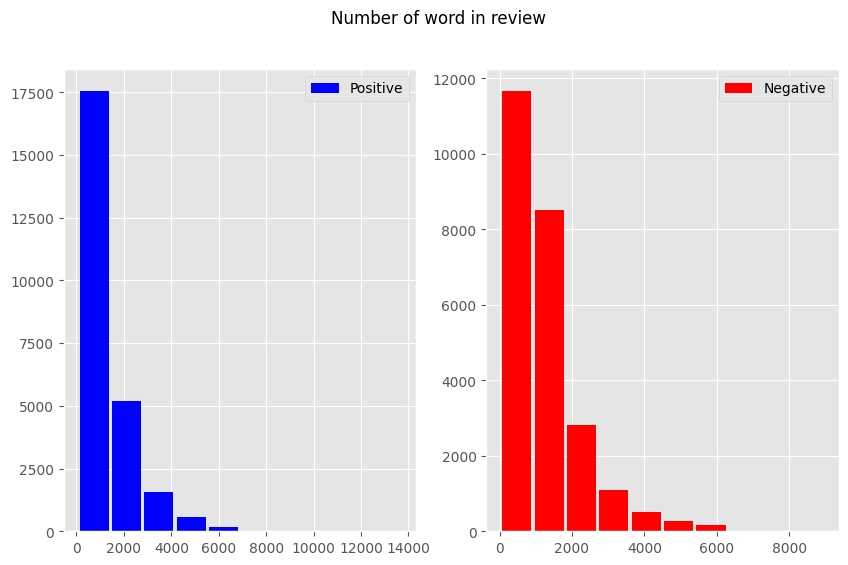

In [14]:
#now plot, same plot but take len of review 
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(data[data["sentiment"]=="positive"]["review"].str.len(), label="Positive", color="blue", rwidth=0.9);
ax[0].legend(loc="upper right");
ax[1].hist(data[data["sentiment"]=="negative"]["review"].str.len(), label="Negative", color="red", rwidth=0.9);
ax[1].legend(loc="upper right");
fig.suptitle("Number of word in review")
plt.show()

In [15]:
#before going to the text processing first convert our text value of review into numerical 
data.sentiment.replace({"positive":1, "negative":0}, inplace=True)

In [16]:
data.head()

review  sentiment  word_count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          0         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

In [17]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kunde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Data Cleaning 

In [18]:
#Tokenization: This involves breaking down the text into individual words or phrases (tokens).
#Stopword Removal: Stopwords are common words that carry little meaning and are usually removed to reduce the size of the feature space. Examples of stopwords include "the", "and", "a", etc.

In [19]:
#text Processing function
def data_processing(text):
    text= text.lower() #convert all into lower alphabhet
    #remove some unuseful characters
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text) #tokenize the word 
    filtered_text = [w for w in text_tokens if not w in stop_words] #remove stopword
    return " ".join(filtered_text)

In [20]:
#apply on our dataset 
data["review"] = data["review"].apply(data_processing)

In [21]:
data

review  sentiment  \
0      one reviewers mentioned watching 1 oz episode ...          1   
1      wonderful little production filming technique ...          1   
2      thought wonderful way spend time hot summer we...          1   
3      basically theres family little boy jake thinks...          0   
4      petter matteis love time money visually stunni...          1   
...                                                  ...        ...   
49995  thought movie right good job wasnt creative or...          1   
49996  bad plot bad dialogue bad acting idiotic direc...          0   
49997  catholic taught parochial elementary schools n...          0   
49998  im going disagree previous comment side maltin...          0   
49999  one expects star trek movies high art fans exp...          0   

       word_count  
0             307  
1             162  
2             166  
3             138  
4             230  
...           ...  
49995         194  
49996         112  
49997         230  
49998         212  
49999         129  

[50000 rows x 3 columns]

In [22]:
#duplicat removal 
duplicated_count = data.duplicated().sum()
duplicated_count

421

In [23]:
data = data.drop_duplicates('review')

In [24]:
#stemmzation on our data :This involves reducing words to their root form, so words with similar meanings are treated as the same word. Stemming uses a simple heuristic to remove suffixes,

In [25]:
stemmer = PorterStemmer()
def stemming(text):
    text_1 = [stemmer.stem(word) for word in data]
    return text

In [26]:
data.review = data["review"].apply(lambda x: stemming(x))

C:\Users\kunde\AppData\Local\Temp\ipykernel_27168\2728139257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.review = data["review"].apply(lambda x: stemming(x))


In [27]:
data

review  sentiment  \
0      one reviewers mentioned watching 1 oz episode ...          1   
1      wonderful little production filming technique ...          1   
2      thought wonderful way spend time hot summer we...          1   
3      basically theres family little boy jake thinks...          0   
4      petter matteis love time money visually stunni...          1   
...                                                  ...        ...   
49995  thought movie right good job wasnt creative or...          1   
49996  bad plot bad dialogue bad acting idiotic direc...          0   
49997  catholic taught parochial elementary schools n...          0   
49998  im going disagree previous comment side maltin...          0   
49999  one expects star trek movies high art fans exp...          0   

       word_count  
0             307  
1             162  
2             166  
3             138  
4             230  
...           ...  
49995         194  
49996         112  
49997         230  
49998         212  
49999         129  

[49578 rows x 3 columns]

In [28]:
data["word_count_after_processing"] = data["review"].apply(lambda x: no_word(x))

C:\Users\kunde\AppData\Local\Temp\ipykernel_27168\3705411324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["word_count_after_processing"] = data["review"].apply(lambda x: no_word(x))


In [29]:
data

review  sentiment  \
0      one reviewers mentioned watching 1 oz episode ...          1   
1      wonderful little production filming technique ...          1   
2      thought wonderful way spend time hot summer we...          1   
3      basically theres family little boy jake thinks...          0   
4      petter matteis love time money visually stunni...          1   
...                                                  ...        ...   
49995  thought movie right good job wasnt creative or...          1   
49996  bad plot bad dialogue bad acting idiotic direc...          0   
49997  catholic taught parochial elementary schools n...          0   
49998  im going disagree previous comment side maltin...          0   
49999  one expects star trek movies high art fans exp...          0   

       word_count  word_count_after_processing  
0             307                          168  
1             162                           84  
2             166                           86  
3             138                           67  
4             230                          125  
...           ...                          ...  
49995         194                           85  
49996         112                           55  
49997         230                          115  
49998         212                          115  
49999         129                           68  

[49578 rows x 4 columns]

In [30]:
#separating + and - review
positive_review = data[data.sentiment==1]
negative_review = data[data.sentiment==0]

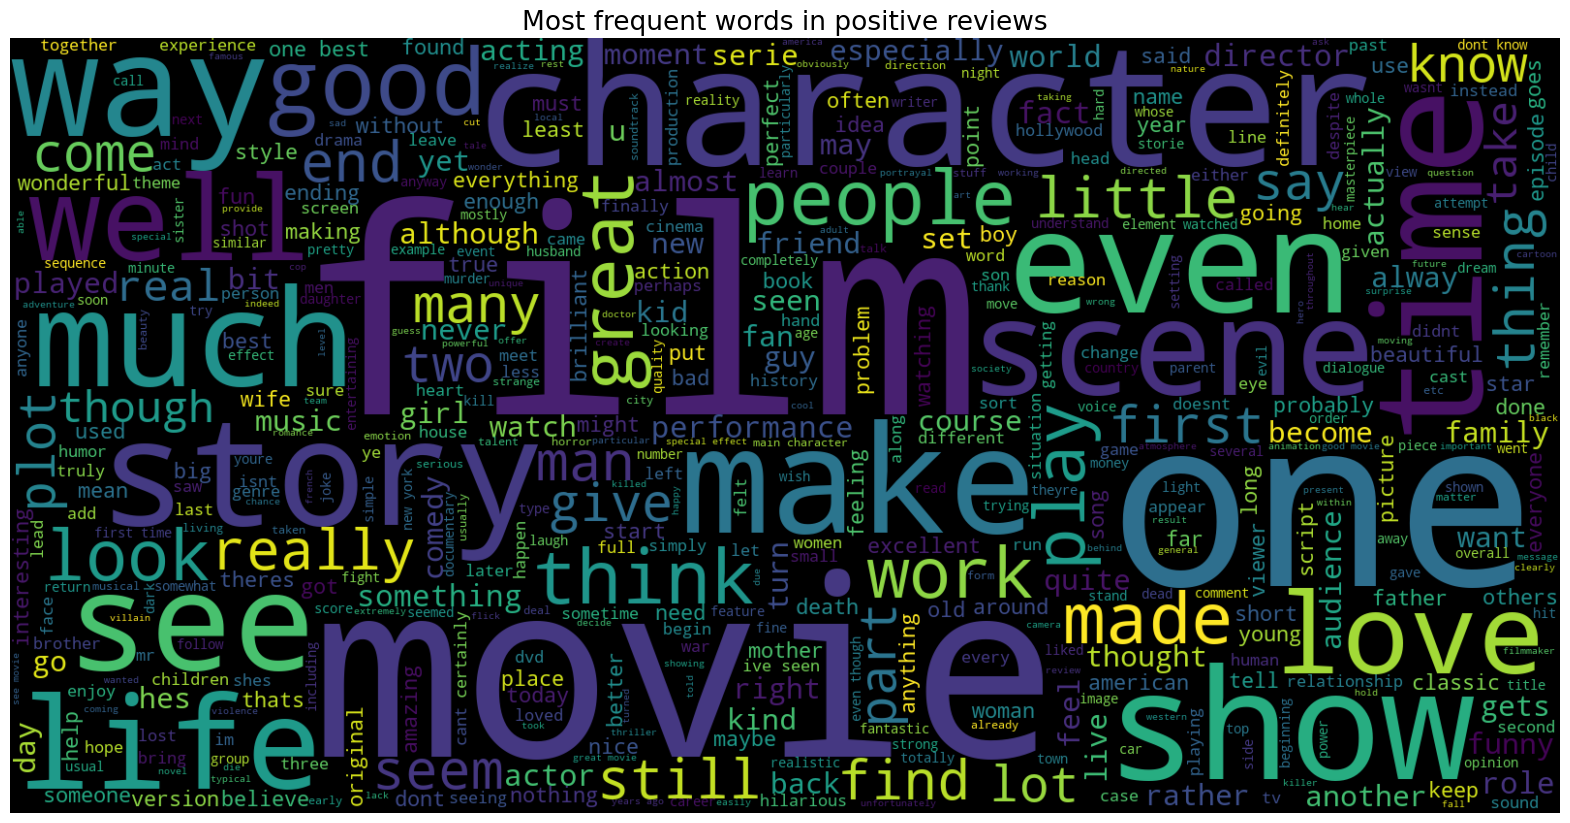

In [31]:
#plot most frequent words in positive reviews
text = ' '.join([word for word in positive_review['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [32]:
#count most common used word 
from collections import Counter 
count = Counter()
for text in positive_review['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(20) 

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971),
 ('first', 8818),
 ('films', 8433),
 ('love', 8363),
 ('people', 8333),
 ('best', 8268)]

In [33]:
#create positive word dataframe
positive_word = pd.DataFrame(count.most_common(20))
positive_word.columns = ["word", "count"]
positive_word.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

In [34]:
#data visulze for positive 
px.bar(positive_word, x="count", y="word", title='Common Word in Positive reviews')

In [35]:
# same for negative review 

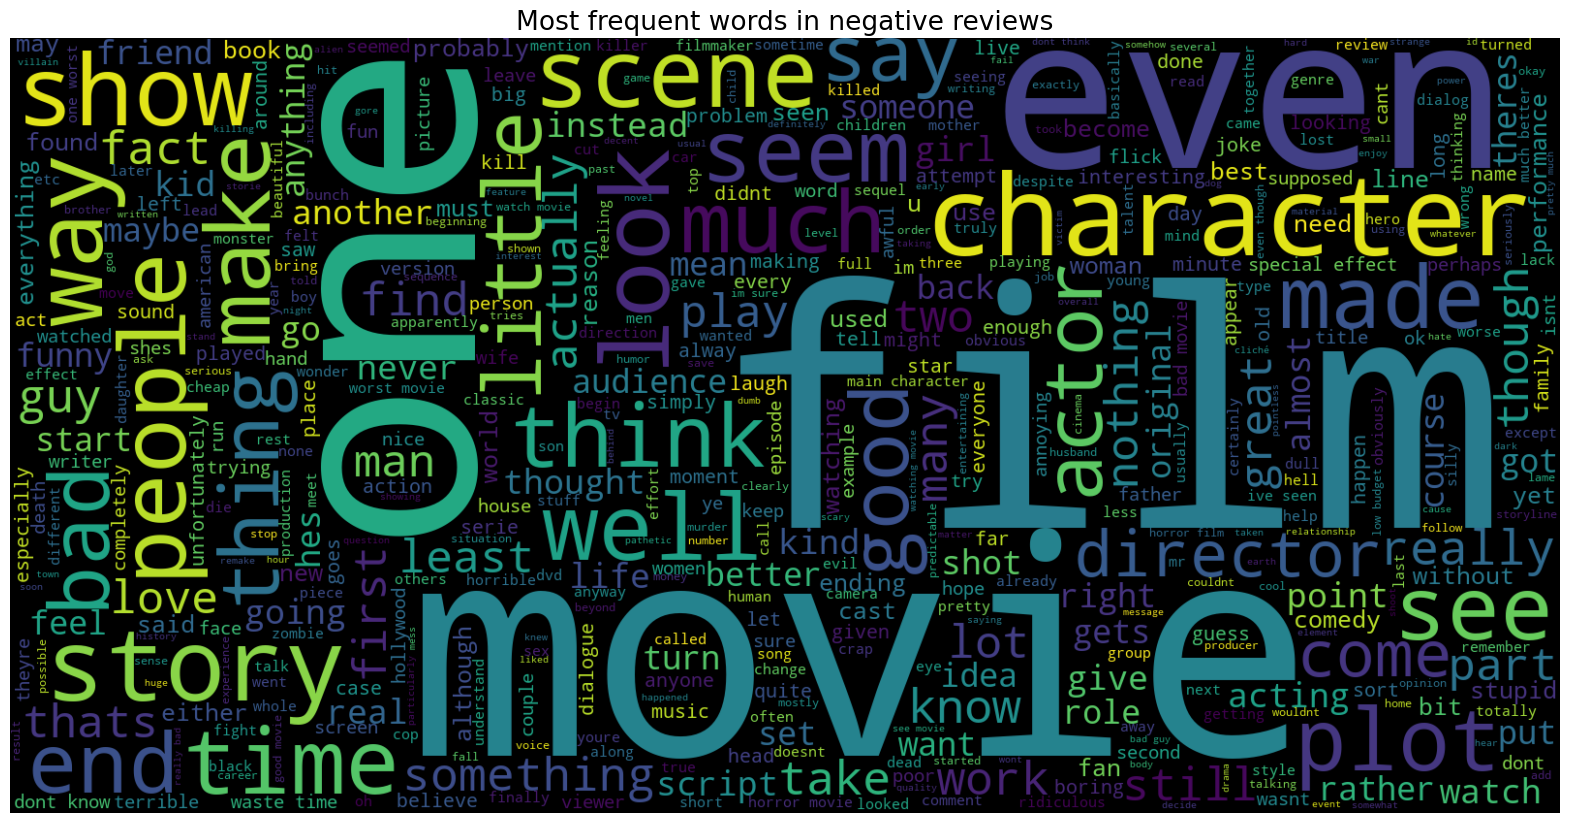

In [36]:
#plot most frequent words in Negative reviews
text = ' '.join([word for word in negative_review['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [37]:
#count most common used word 
from collections import Counter 
count = Counter()
for text in negative_review['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(20) 

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563),
 ('people', 8988),
 ('could', 8917),
 ('make', 8901),
 ('made', 8299),
 ('movies', 8284)]

In [38]:
#create negative word dataframe
negative_word = pd.DataFrame(count.most_common(20))
negative_word.columns = ["word", "count"]
negative_word.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

In [39]:
#data visulze for positive 
px.bar(positive_word, x="count", y="word", title='Common Word in Positive reviews', color='word')

In [40]:
#divide data into x and y 
x = data['review']
y = data["sentiment"]


In [41]:
#transform data into vector 
vect = TfidfVectorizer()
X = vect.fit_transform(data['review'])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
print("size of train data", x_train.shape, y_train.shape)
print("size of test data", x_test.shape, y_test.shape)

size of train data (39662, 221707) (39662,)
size of test data (9916, 221707) (9916,)


### create ML model

In [44]:
#import Labrary
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings #it is importing to ignore any warning
warnings.filterwarnings('ignore')

In [45]:
## Logistic Regression model

In [46]:
logist = LogisticRegression()
logist.fit(x_train, y_train)

LogisticRegression()

In [47]:
losit_train = logist.predict(x_train)
print("train accuracy :- ", accuracy_score(losit_train, y_train))

train accuracy :-  0.9367908829610206


In [48]:
#classification report and confusion matrix
print("Classification report for train data:- ")
print(classification_report(losit_train, y_train), "\n")

print("Confusion matrix for train data:- ")
print(confusion_matrix(losit_train, y_train))

Classification report for train data:- 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     19535
           1       0.94      0.93      0.94     20127

    accuracy                           0.94     39662
   macro avg       0.94      0.94      0.94     39662
weighted avg       0.94      0.94      0.94     39662
 

Confusion matrix for train data:- 
[[18439  1096]
 [ 1411 18716]]


In [49]:
losit_test = logist.predict(x_test)
print("test accuracy :- ", accuracy_score(losit_test, y_test))

test accuracy :-  0.8919927390076644


In [50]:
#classification report and confusion matrix
print("Classification report for test data:- ")
print(classification_report(losit_test, y_test), "\n")

print("Confusion matrix for test data:- ")
print(confusion_matrix(losit_test, y_test))

Classification report for test data:- 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4750
           1       0.90      0.89      0.90      5166

    accuracy                           0.89      9916
   macro avg       0.89      0.89      0.89      9916
weighted avg       0.89      0.89      0.89      9916
 

Confusion matrix for test data:- 
[[4262  488]
 [ 583 4583]]


In [51]:
## Multinomial model

In [52]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [53]:
#train data 

In [54]:
losit_train = model.predict(x_train)
print("train accuracy :- ", accuracy_score(losit_train, y_train))

train accuracy :-  0.9200746306288135


In [55]:
#classification report and confusion matrix
print("Classification report for train data:- ")
print(classification_report(losit_train, y_train), "\n")

print("Confusion matrix for train data:- ")
print(confusion_matrix(losit_train, y_train))

Classification report for train data:- 
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     20340
           1       0.91      0.93      0.92     19322

    accuracy                           0.92     39662
   macro avg       0.92      0.92      0.92     39662
weighted avg       0.92      0.92      0.92     39662
 

Confusion matrix for train data:- 
[[18510  1830]
 [ 1340 17982]]


In [56]:
#for test data

In [57]:
losit_test = model.predict(x_test)
print("test accuracy :- ", accuracy_score(losit_test, y_test))

test accuracy :-  0.8631504638967326


In [58]:
#classification report and confusion matrix
print("Classification report for test data:- ")
print(classification_report(losit_test, y_test), "\n")

print("Confusion matrix for test data:- ")
print(confusion_matrix(losit_test, y_test))

Classification report for test data:- 
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4974
           1       0.85      0.88      0.86      4942

    accuracy                           0.86      9916
   macro avg       0.86      0.86      0.86      9916
weighted avg       0.86      0.86      0.86      9916
 

Confusion matrix for test data:- 
[[4231  743]
 [ 614 4328]]


In [59]:
## SVM model

In [60]:
model_svm = LinearSVC()
model_svm.fit(x_train, y_train)

LinearSVC()

In [61]:
losit_train = model_svm.predict(x_train)
print("train accuracy :- ", accuracy_score(losit_train, y_train))

train accuracy :-  0.9929655589733246


In [62]:
#classification report and confusion matrix
print("Classification report for train data:- ")
print(classification_report(losit_train, y_train), "\n")

print("Confusion matrix for train data:- ")
print(confusion_matrix(losit_train, y_train))

Classification report for train data:- 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19837
           1       0.99      0.99      0.99     19825

    accuracy                           0.99     39662
   macro avg       0.99      0.99      0.99     39662
weighted avg       0.99      0.99      0.99     39662
 

Confusion matrix for train data:- 
[[19704   133]
 [  146 19679]]


In [63]:
losit_test = model_svm.predict(x_test)
print("test accuracy :- ", accuracy_score(losit_test, y_test))

test accuracy :-  0.8949173053650665


In [64]:
#classification report and confusion matrix
print("Classification report for test data:- ")
print(classification_report(losit_test, y_test), "\n")

print("Confusion matrix for test data:- ")
print(confusion_matrix(losit_test, y_test))

Classification report for test data:- 
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4765
           1       0.91      0.89      0.90      5151

    accuracy                           0.89      9916
   macro avg       0.89      0.90      0.89      9916
weighted avg       0.90      0.89      0.89      9916
 

Confusion matrix for test data:- 
[[4284  481]
 [ 561 4590]]
